# Detector de Canciones de Death Metal


# Setup

In [ ]:
!pip install gdown==4.3

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1fnK2rKgQSZnJWdMnIvLlBD0gXRyjQEYf?usp=sharing

Retrieving folder list
Processing file 1wuJvKgpeqlQ2xp9u7aHLyISjOhXOCEyp df_artists_and_genre.csv
Processing file 1Pd331PBLY418czwaGKws--FWSOQ7_DXf df_track_audio_features.csv
Processing file 1lBpKNEd-DTRTrx_8smx2eeQQUP6fhInp df_tracks_by_artist.csv
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1wuJvKgpeqlQ2xp9u7aHLyISjOhXOCEyp
To: /content/datos_deathmetal/df_artists_and_genre.csv
100% 9.88k/9.88k [00:00<00:00, 31.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Pd331PBLY418czwaGKws--FWSOQ7_DXf
To: /content/datos_deathmetal/df_track_audio_features.csv
100% 560k/560k [00:00<00:00, 94.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lBpKNEd-DTRTrx_8smx2eeQQUP6fhInp
To: /content/datos_deathmetal/df_tracks_by_artist.csv
100% 137k/137k [00:00<00:00, 82.3MB/s]
Download completed


Ruta a los datos:

In [ ]:
!ls /content/datos_deathmetal

df_artists_and_genre.csv  df_track_audio_features.csv  df_tracks_by_artist.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_artists_and_genre = pd.read_csv('/content/datos_deathmetal/df_artists_and_genre.csv')
df_artists_and_genre.head()

,artist_name,artist_id,genre
0,Blake Shelton,1UTPBmNbXNTittyMJrNkvw,classic oklahoma country
1,Dissection,6qpmcQfxhmNxNMCJUrpHwe,black metal
2,Arctic Monkeys,7Ln80lUS6He07XvHI8qqHH,garage rock
3,Grateful Dead,4TMHGUX5WI7OOm53PqSDAT,cosmic american
4,Blur,7MhMgCo0Bl0Kukl93PZbYS,alternative rock


In [ ]:
df_artists_and_genre= df_artists_and_genre.drop_duplicates(subset='artist_id')
df_artists_and_genre.head()

,artist_name,artist_id,genre
0,Blake Shelton,1UTPBmNbXNTittyMJrNkvw,classic oklahoma country
1,Dissection,6qpmcQfxhmNxNMCJUrpHwe,black metal
2,Arctic Monkeys,7Ln80lUS6He07XvHI8qqHH,garage rock
3,Grateful Dead,4TMHGUX5WI7OOm53PqSDAT,cosmic american
4,Blur,7MhMgCo0Bl0Kukl93PZbYS,alternative rock


In [ ]:
df_artists_and_genre.shape

(204, 3)

In [ ]:
df_artists_and_genre['artist_id'].nunique()

204

In [ ]:
df_track_audio_features= pd.read_csv('/content/datos_deathmetal/df_track_audio_features.csv')
df_track_audio_features.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,2yzV2Mibk7V29pINPAGvvZ,0.154,0.766,8.0,-5.434,1.0,0.0476,0.000035,0.7930,0.120,0.167,70.313,audio_features,spotify:track:2yzV2Mibk7V29pINPAGvvZ,https://api.spotify.com/v1/tracks/2yzV2Mibk7V2...,https://api.spotify.com/v1/audio-analysis/2yzV...,316987,4
1,1NODkudB2DhHEe8H3X3iFG,0.432,0.990,7.0,-4.870,1.0,0.0839,0.000076,0.0190,0.301,0.216,93.955,audio_features,spotify:track:1NODkudB2DhHEe8H3X3iFG,https://api.spotify.com/v1/tracks/1NODkudB2DhH...,https://api.spotify.com/v1/audio-analysis/1NOD...,280253,4
2,7eYYxblNEZKKeTT0HBQbXO,0.338,0.620,7.0,-8.220,1.0,0.0455,0.737000,0.2670,0.624,0.500,176.922,audio_features,spotify:track:7eYYxblNEZKKeTT0HBQbXO,https://api.spotify.com/v1/tracks/7eYYxblNEZKK...,https://api.spotify.com/v1/audio-analysis/7eYY...,261893,3
3,4feXJ5IC3avXsVW9WNFSag,0.547,0.931,2.0,-2.356,1.0,0.0615,0.000998,0.0118,0.278,0.697,118.400,audio_features,spotify:track:4feXJ5IC3avXsVW9WNFSag,https://api.spotify.com/v1/tracks/4feXJ5IC3avX...,https://api.spotify.com/v1/audio-analysis/4feX...,261507,4
4,567e29TDzLwZwfDuEpGTwo,0.591,0.764,1.0,-5.484,1.0,0.0483,0.038300,0.0000,0.103,0.478,169.928,audio_features,spotify:track:567e29TDzLwZwfDuEpGTwo,https://api.spotify.com/v1/tracks/567e29TDzLwZ...,https://api.spotify.com/v1/audio-analysis/567e...,141806,4


In [ ]:
df_track_audio_features= df_track_audio_features.drop_duplicates(subset='track_id')
df_track_audio_features.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,2yzV2Mibk7V29pINPAGvvZ,0.154,0.766,8.0,-5.434,1.0,0.0476,0.000035,0.7930,0.120,0.167,70.313,audio_features,spotify:track:2yzV2Mibk7V29pINPAGvvZ,https://api.spotify.com/v1/tracks/2yzV2Mibk7V2...,https://api.spotify.com/v1/audio-analysis/2yzV...,316987,4
1,1NODkudB2DhHEe8H3X3iFG,0.432,0.990,7.0,-4.870,1.0,0.0839,0.000076,0.0190,0.301,0.216,93.955,audio_features,spotify:track:1NODkudB2DhHEe8H3X3iFG,https://api.spotify.com/v1/tracks/1NODkudB2DhH...,https://api.spotify.com/v1/audio-analysis/1NOD...,280253,4
2,7eYYxblNEZKKeTT0HBQbXO,0.338,0.620,7.0,-8.220,1.0,0.0455,0.737000,0.2670,0.624,0.500,176.922,audio_features,spotify:track:7eYYxblNEZKKeTT0HBQbXO,https://api.spotify.com/v1/tracks/7eYYxblNEZKK...,https://api.spotify.com/v1/audio-analysis/7eYY...,261893,3
3,4feXJ5IC3avXsVW9WNFSag,0.547,0.931,2.0,-2.356,1.0,0.0615,0.000998,0.0118,0.278,0.697,118.400,audio_features,spotify:track:4feXJ5IC3avXsVW9WNFSag,https://api.spotify.com/v1/tracks/4feXJ5IC3avX...,https://api.spotify.com/v1/audio-analysis/4feX...,261507,4
4,567e29TDzLwZwfDuEpGTwo,0.591,0.764,1.0,-5.484,1.0,0.0483,0.038300,0.0000,0.103,0.478,169.928,audio_features,spotify:track:567e29TDzLwZwfDuEpGTwo,https://api.spotify.com/v1/tracks/567e29TDzLwZ...,https://api.spotify.com/v1/audio-analysis/567e...,141806,4


In [ ]:
df_track_audio_features['track_id'].nunique()

2029

In [ ]:
df_track_audio_features.shape

(2029, 18)

In [ ]:
df_tracks_by_artist = pd.read_csv('/content/datos_deathmetal/df_tracks_by_artist.csv')
df_tracks_by_artist.head()

,artist_id,track_id,track_name
0,2urZrEdsq72kx0UzfYN8Yv,0kKbwhBOhniM9Ndk5GPh8z,Chant No. 1 (I Don't Need This Pressure On) - ...
1,2x9SpqnPi8rlE9pjHBwmSC,5JwK7v6XhG0YgqDuCgzOy8,And She Was
2,43ZHCT0cAZBISjO8DG9PnE,1H5IfYyIIAlgDX8zguUzns,Suspicious Minds
3,4Z8W4fKeB5YxbusRsdQVPb,0YJ9FWWHn9EfnN0lHwbzvV,Jigsaw Falling Into Place
4,1HY2Jd0NmPuamShAr6KMms,0SiywuOBRcynK0uKGWdCnn,Bad Romance


In [ ]:
df_tracks_by_artist= df_tracks_by_artist.drop_duplicates(subset='track_id')
df_tracks_by_artist.head()

,artist_id,track_id,track_name
0,2urZrEdsq72kx0UzfYN8Yv,0kKbwhBOhniM9Ndk5GPh8z,Chant No. 1 (I Don't Need This Pressure On) - ...
1,2x9SpqnPi8rlE9pjHBwmSC,5JwK7v6XhG0YgqDuCgzOy8,And She Was
2,43ZHCT0cAZBISjO8DG9PnE,1H5IfYyIIAlgDX8zguUzns,Suspicious Minds
3,4Z8W4fKeB5YxbusRsdQVPb,0YJ9FWWHn9EfnN0lHwbzvV,Jigsaw Falling Into Place
4,1HY2Jd0NmPuamShAr6KMms,0SiywuOBRcynK0uKGWdCnn,Bad Romance


In [ ]:
df_tracks_by_artist.shape

(2029, 3)

In [ ]:
df_tracks_by_artist['track_id'].nunique()

2029

In [ ]:
df_merge_artistGenre_tracksArtist = pd.merge(df_artists_and_genre, df_tracks_by_artist, left_on='artist_id', right_on='artist_id', how='inner')
df_merge_artistGenre_tracksArtist.head()

,artist_name,artist_id,genre,track_id,track_name
0,Blake Shelton,1UTPBmNbXNTittyMJrNkvw,classic oklahoma country,00qudEDb3zFWZvgro9MPRB,You Make It Feel Like Christmas
1,Blake Shelton,1UTPBmNbXNTittyMJrNkvw,classic oklahoma country,0gY2iq0xJPRoIB1PScKSw4,Honey Bee
2,Blake Shelton,1UTPBmNbXNTittyMJrNkvw,classic oklahoma country,1VnWGO6qNxN7TCnUZv7TOR,Winter Wonderland
3,Blake Shelton,1UTPBmNbXNTittyMJrNkvw,classic oklahoma country,5M8goiFYynmNxhueYW6grR,Nobody But You (Duet with Gwen Stefani)
4,Blake Shelton,1UTPBmNbXNTittyMJrNkvw,classic oklahoma country,0ehRgzGf5GxSr4eP427lXB,Jingle Bell Rock


In [ ]:
df_merge_artistGenre_tracksArtist.drop(columns='artist_id', axis=1, inplace=True)
df_merge_artistGenre_tracksArtist.head(1)

,artist_name,genre,track_id,track_name
0,Blake Shelton,classic oklahoma country,00qudEDb3zFWZvgro9MPRB,You Make It Feel Like Christmas


In [ ]:
df = pd.merge(df_merge_artistGenre_tracksArtist, df_track_audio_features, left_on='track_id', right_on='track_id', how='inner')
df.head()

,artist_name,genre,track_id,track_name,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,Blake Shelton,classic oklahoma country,00qudEDb3zFWZvgro9MPRB,You Make It Feel Like Christmas,0.635,0.870,2.0,-4.291,0.0,0.0400,...,0.000000,0.1110,0.912,92.999,audio_features,spotify:track:00qudEDb3zFWZvgro9MPRB,https://api.spotify.com/v1/tracks/00qudEDb3zFW...,https://api.spotify.com/v1/audio-analysis/00qu...,157800,4
1,Blake Shelton,classic oklahoma country,0gY2iq0xJPRoIB1PScKSw4,Honey Bee,0.481,0.849,4.0,-5.131,1.0,0.0385,...,0.000001,0.1210,0.723,205.570,audio_features,spotify:track:0gY2iq0xJPRoIB1PScKSw4,https://api.spotify.com/v1/tracks/0gY2iq0xJPRo...,https://api.spotify.com/v1/audio-analysis/0gY2...,210720,4
2,Blake Shelton,classic oklahoma country,1VnWGO6qNxN7TCnUZv7TOR,Winter Wonderland,0.646,0.696,0.0,-6.537,1.0,0.0303,...,0.000022,0.3070,0.633,124.011,audio_features,spotify:track:1VnWGO6qNxN7TCnUZv7TOR,https://api.spotify.com/v1/tracks/1VnWGO6qNxN7...,https://api.spotify.com/v1/audio-analysis/1VnW...,135413,4
3,Blake Shelton,classic oklahoma country,5M8goiFYynmNxhueYW6grR,Nobody But You (Duet with Gwen Stefani),0.463,0.653,0.0,-5.515,1.0,0.0273,...,0.000136,0.1720,0.233,143.912,audio_features,spotify:track:5M8goiFYynmNxhueYW6grR,https://api.spotify.com/v1/tracks/5M8goiFYynmN...,https://api.spotify.com/v1/audio-analysis/5M8g...,194867,4
4,Blake Shelton,classic oklahoma country,0ehRgzGf5GxSr4eP427lXB,Jingle Bell Rock,0.650,0.736,0.0,-5.222,1.0,0.0378,...,0.000000,0.0998,0.595,129.941,audio_features,spotify:track:0ehRgzGf5GxSr4eP427lXB,https://api.spotify.com/v1/tracks/0ehRgzGf5GxS...,https://api.spotify.com/v1/audio-analysis/0ehR...,123400,4


In [ ]:
df.columns

Index(['artist_name', 'genre', 'track_id', 'track_name', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [ ]:
df['type'].value_counts()

audio_features    2029
Name: type, dtype: int64

In [ ]:
variables_a_dropear = ['artist_name', 'track_id', 'track_name', 'type', 'uri', 'track_href', 'analysis_url']
df.drop(columns=variables_a_dropear, axis=1, inplace=True)

### Analisis descriptivo

In [ ]:
df.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,classic oklahoma country,0.635,0.870,2.0,-4.291,0.0,0.0400,0.01520,0.000000,0.1110,0.912,92.999,157800,4
1,classic oklahoma country,0.481,0.849,4.0,-5.131,1.0,0.0385,0.00167,0.000001,0.1210,0.723,205.570,210720,4
2,classic oklahoma country,0.646,0.696,0.0,-6.537,1.0,0.0303,0.13300,0.000022,0.3070,0.633,124.011,135413,4
3,classic oklahoma country,0.463,0.653,0.0,-5.515,1.0,0.0273,0.11100,0.000136,0.1720,0.233,143.912,194867,4
4,classic oklahoma country,0.650,0.736,0.0,-5.222,1.0,0.0378,0.12200,0.000000,0.0998,0.595,129.941,123400,4


In [ ]:
df['genre'].head(30)

0     classic oklahoma country
1     classic oklahoma country
2     classic oklahoma country
3     classic oklahoma country
4     classic oklahoma country
5     classic oklahoma country
6     classic oklahoma country
7     classic oklahoma country
8     classic oklahoma country
9     classic oklahoma country
10                 black metal
11                 black metal
12                 black metal
13                 black metal
14                 black metal
15                 black metal
16                 black metal
17                 black metal
18                 black metal
19                 black metal
20                 garage rock
21                 garage rock
22                 garage rock
23                 garage rock
24                 garage rock
25                 garage rock
26                 garage rock
27                 garage rock
28                 garage rock
29                 garage rock
Name: genre, dtype: object

In [ ]:
df[df['genre'] == 'death metal']

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
70,death metal,0.520,0.975,4.0,-4.742,0.0,0.1500,0.000008,0.092800,0.0831,0.2090,110.030,264253,4
71,death metal,0.395,0.986,1.0,-6.392,0.0,0.1430,0.000212,0.000781,0.0841,0.1400,94.969,239425,4
72,death metal,0.486,0.894,1.0,-5.026,0.0,0.0350,0.000009,0.432000,0.1120,0.1510,113.013,220840,4
73,death metal,0.413,0.969,11.0,-4.910,0.0,0.0822,0.000159,0.344000,0.1800,0.1790,75.026,259960,4
74,death metal,0.424,0.938,4.0,-5.229,1.0,0.0740,0.000007,0.159000,0.2270,0.3500,143.995,355307,4
75,death metal,NaN,0.994,4.0,-4.514,0.0,0.0944,0.000004,0.065800,NaN,0.1900,124.972,212373,4
76,death metal,0.340,0.886,8.0,-8.245,0.0,0.0492,0.003350,0.102000,0.1260,0.0702,112.928,282907,1
77,death metal,0.464,0.964,6.0,-4.338,1.0,0.0603,0.000128,0.205000,0.3240,0.5850,135.078,254107,4
78,death metal,0.405,0.888,3.0,-5.764,0.0,0.0436,0.000052,0.799000,0.0729,0.3440,145.965,182387,4
79,death metal,0.408,0.968,6.0,-5.852,0.0,0.0691,0.000020,0.001880,0.2820,0.5160,100.020,221760,4


In [ ]:
def es_metal(genre):
  if 'death metal' in genre:
    return 1
  else:
    return 0

df['genre'].apply(es_metal)

0       0
1       0
2       0
3       0
4       0
       ..
2024    0
2025    0
2026    0
2027    0
2028    0
Name: genre, Length: 2029, dtype: int64

In [ ]:
df['death_metal'] = df['genre'].apply(es_metal)

In [ ]:
df['death_metal'].value_counts() # serían 160 canciones del genero death metal

0    1869
1     160
Name: death_metal, dtype: int64

In [ ]:
df.drop(columns='genre', axis=1, inplace=True)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,death_metal
0,0.635,0.870,2.0,-4.291,0.0,0.0400,0.01520,0.000000,0.1110,0.912,92.999,157800,4,0
1,0.481,0.849,4.0,-5.131,1.0,0.0385,0.00167,0.000001,0.1210,0.723,205.570,210720,4,0
2,0.646,0.696,0.0,-6.537,1.0,0.0303,0.13300,0.000022,0.3070,0.633,124.011,135413,4,0
3,0.463,0.653,0.0,-5.515,1.0,0.0273,0.11100,0.000136,0.1720,0.233,143.912,194867,4,0
4,0.650,0.736,0.0,-5.222,1.0,0.0378,0.12200,0.000000,0.0998,0.595,129.941,123400,4,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2029 entries, 0 to 2028
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      2008 non-null   float64
 1   energy            2029 non-null   float64
 2   key               2011 non-null   float64
 3   loudness          2011 non-null   float64
 4   mode              2011 non-null   float64
 5   speechiness       2011 non-null   float64
 6   acousticness      2011 non-null   float64
 7   instrumentalness  2011 non-null   float64
 8   liveness          2008 non-null   float64
 9   valence           2029 non-null   float64
 10  tempo             2029 non-null   float64
 11  duration_ms       2029 non-null   int64  
 12  time_signature    2029 non-null   int64  
 13  death_metal       2029 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 237.8 KB


In [ ]:
df.isna().sum()

danceability        21
energy               0
key                 18
loudness            18
mode                18
speechiness         18
acousticness        18
instrumentalness    18
liveness            21
valence              0
tempo                0
duration_ms          0
time_signature       0
death_metal          0
dtype: int64

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,1990.0,0.497973,0.170667,0.0750,0.369250,0.504000,0.626000,0.942
energy,1990.0,0.959478,4.117746,0.0400,0.594250,0.782000,0.923000,96.400
key,1990.0,5.181910,3.547009,0.0000,2.000000,5.000000,8.000000,11.000
loudness,1990.0,-7.293143,3.229864,-28.8140,-9.016000,-6.529000,-4.993250,-1.191
mode,1990.0,0.697990,0.459245,0.0000,0.000000,1.000000,1.000000,1.000
speechiness,1990.0,0.069133,0.057400,0.0232,0.034200,0.047500,0.083000,0.542
acousticness,1990.0,0.166348,0.240263,0.0000,0.000798,0.042400,0.237000,0.984
instrumentalness,1990.0,0.143037,0.277009,0.0000,0.000002,0.000473,0.098225,0.987
liveness,1990.0,0.190630,0.154813,0.0207,0.091625,0.130000,0.248000,0.983
valence,1990.0,0.468338,0.257354,0.0299,0.251000,0.454500,0.675000,0.978


In [70]:
df.loc[df['duration_ms'] > 600000] # no son deathmetal

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,death_metal
197,0.338,0.461,9.0,-10.740,0.0,0.0396,0.170000,0.564000,0.0927,0.3510,126.698,620373,4,0
299,0.264,0.294,7.0,-11.941,0.0,0.0280,0.772000,0.686000,0.1070,0.0402,137.937,811077,3,0
1655,0.291,0.437,9.0,-10.486,1.0,0.0363,0.199000,0.000206,0.0762,0.2190,78.170,607787,3,0
1657,0.222,0.597,5.0,-10.924,1.0,0.0560,0.265000,0.155000,0.4110,0.2510,80.654,1121253,3,0
1850,0.292,0.818,9.0,-6.227,0.0,0.0413,0.000697,0.001920,0.0544,0.1900,93.924,629480,3,0
1854,0.103,0.859,7.0,-6.107,1.0,0.0803,0.000339,0.168000,0.0974,0.3060,186.415,652040,3,0
1878,0.246,0.832,1.0,-10.269,0.0,0.0969,0.001110,0.035700,0.1000,0.1630,152.181,733333,4,0


In [71]:
df.loc[df['energy'] > 1, 'energy'] = np.nan
df.loc[df['duration_ms'] > 600000, 'duration_ms'] = np.nan #canciones mayores a 10 min

In [72]:
df.dropna(inplace=True)

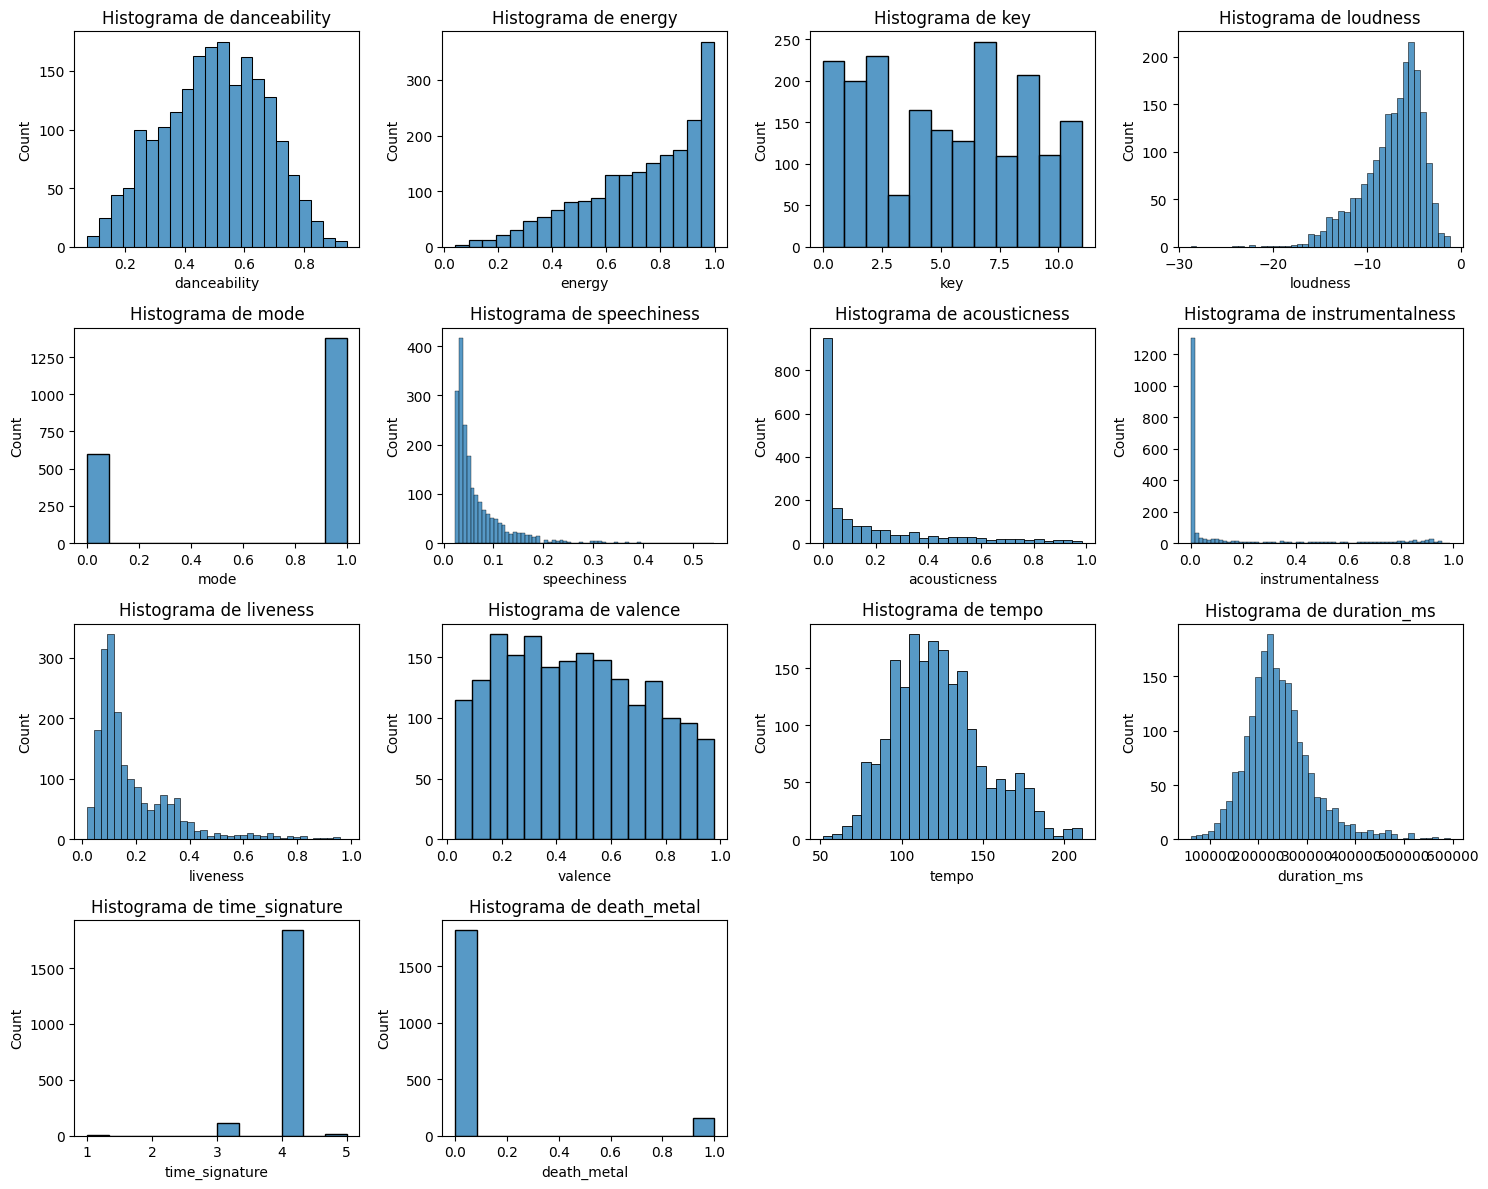

In [73]:
columnas = df.select_dtypes(include='number').columns
num_plots = len(columnas)
num_rows = num_plots // 4 + (num_plots%4>0)
num_cols = min(4, num_plots)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

for i, column in enumerate(columnas):
  row = i // num_cols
  col = i % num_cols
  sns.histplot(x=df[column], ax=axes[row, col])
  axes[row, col].set_title(f'Histograma de {column}')

for i in range(num_plots, num_rows * num_cols):
      fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()

In [63]:
df['energy'].max()

96.4

In [75]:
# Exlcuir variables catégoricas
columns_to_exclude = ['mode', 'time_signature', 'death_metal', 'key']
columns_to_include = [col for col in df.columns if col not in columns_to_exclude]

# Columnas seleccionadas
df_subset = df[columns_to_include]

# Crea el pairplot con las columnas seleccionadas
sns.pairplot(df_subset)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Preprocesamiento

In [76]:
# Binariza las variables 'time_signature' y 'key' usando get_dummies
df = pd.get_dummies(df, columns=['time_signature', 'key'], drop_first=True)

df_modelar = df.copy()

# Muestra el DataFrame preprocesado
df_modelar.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0
0,0.635,0.870,-4.291,0.0,0.0400,0.01520,0.000000,0.1110,0.912,92.999,...,1,0,0,0,0,0,0,0,0,0
1,0.481,0.849,-5.131,1.0,0.0385,0.00167,0.000001,0.1210,0.723,205.570,...,0,0,1,0,0,0,0,0,0,0
2,0.646,0.696,-6.537,1.0,0.0303,0.13300,0.000022,0.3070,0.633,124.011,...,0,0,0,0,0,0,0,0,0,0
3,0.463,0.653,-5.515,1.0,0.0273,0.11100,0.000136,0.1720,0.233,143.912,...,0,0,0,0,0,0,0,0,0,0
4,0.650,0.736,-5.222,1.0,0.0378,0.12200,0.000000,0.0998,0.595,129.941,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Divide el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_modelar[df_modelar.columns.difference(['death_metal'])], df_modelar['death_metal'], test_size=0.2, random_state=1234)


In [78]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# definicion del método
smote = SMOTE(random_state=101, sampling_strategy="minority")
# aplicación del método
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# contamos la cantidad de observaciones por clase
print(f"Original: {Counter(y_train)}")
print(f"SMOTE   : {Counter(y_train_smote)}")

Original: Counter({0: 1458, 1: 122})
SMOTE   : Counter({0: 1458, 1: 1458})


In [79]:
from sklearn.preprocessing import StandardScaler

# Identifica las columnas numéricas en tus conjuntos de entrenamiento y prueba
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Especifica las columnas que no deseas estandarizar
columns_to_exclude = ['death_metal', 'mode', 'key', 'time_signature']

# Obtiene las columnas numéricas que no están en la lista de exclusiones
numeric_columns_to_scale = [col for col in numeric_columns if col not in columns_to_exclude]

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ajusta y transforma solo las columnas numéricas que no están excluidas en el conjunto de entrenamiento
X_train[numeric_columns_to_scale] = scaler.fit_transform(X_train[numeric_columns_to_scale])

# Transforma solo las columnas numéricas que no están excluidas en el conjunto de prueba usando las mismas estadísticas
X_test[numeric_columns_to_scale] = scaler.transform(X_test[numeric_columns_to_scale])


In [80]:
X_train.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key_1.0,key_10.0,key_11.0,key_2.0,key_3.0,...,key_9.0,liveness,loudness,mode,speechiness,tempo,time_signature_3,time_signature_4,time_signature_5,valence
1593,1.020899,1.549216,-0.292786,0.155220,-0.323209,0,0,0,0,0,...,0,-0.084173,-0.629856,1.0,-0.590938,0.186988,0,1,0,1.760332
187,-0.692922,-1.168886,0.218905,0.270416,2.644482,0,0,0,0,0,...,0,-0.390469,0.277184,0.0,-0.388368,-0.229423,0,1,0,-0.598733
939,-0.544953,1.724577,-0.579004,0.311886,-0.511142,1,0,0,0,0,...,0,-0.629762,0.299708,1.0,-0.657889,-0.237425,0,1,0,1.803154
862,-0.361448,-0.958452,3.128009,0.251984,-0.276884,0,1,0,0,0,...,0,0.828331,-0.456057,0.0,0.068273,0.600254,0,1,0,-0.341805
400,-0.596786,1.256947,-1.500076,0.169043,-0.508755,0,0,0,1,0,...,0,-0.403231,0.628433,1.0,0.614183,1.153233,0,1,0,1.635761


### Baseline - logit

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logit_baseline = LogisticRegression(random_state=1234).fit(X_train, y_train)
y_pred = logit_baseline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       360
           1       0.57      0.11      0.19        36

    accuracy                           0.91       396
   macro avg       0.74      0.55      0.57       396
weighted avg       0.89      0.91      0.88       396



### Baseline - smote


In [82]:
from sklearn.preprocessing import StandardScaler

# Identifica las columnas numéricas en tus conjuntos de entrenamiento y prueba
numeric_columns = X_train_smote.select_dtypes(include=['float64', 'int64']).columns

# Especifica las columnas que no deseas estandarizar
columns_to_exclude = ['death_metal', 'mode', 'key', 'time_signature']

# Obtiene las columnas numéricas que no están en la lista de exclusiones
numeric_columns_to_scale = [col for col in numeric_columns if col not in columns_to_exclude]

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ajusta y transforma solo las columnas numéricas que no están excluidas en el conjunto de entrenamiento
X_train_smote[numeric_columns_to_scale] = scaler.fit_transform(X_train_smote[numeric_columns_to_scale])

# Transforma solo las columnas numéricas que no están excluidas en el conjunto de prueba usando las mismas estadísticas
X_test[numeric_columns_to_scale] = scaler.transform(X_test[numeric_columns_to_scale])

# Entrenamiento y metricas
logit_baseline = LogisticRegression(random_state=1234).fit(X_train_smote, y_train_smote)
y_pred = logit_baseline.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.65      0.79       360
           1       0.22      1.00      0.36        36

    accuracy                           0.68       396
   macro avg       0.61      0.82      0.57       396
weighted avg       0.93      0.68      0.75       396



In [83]:
y_pred_train= logit_baseline.predict(X_train_smote)

print(classification_report(y_train_smote, y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1458
           1       0.90      0.92      0.91      1458

    accuracy                           0.91      2916
   macro avg       0.91      0.91      0.91      2916
weighted avg       0.91      0.91      0.91      2916



### Selección atributos con RandomForestClassifier

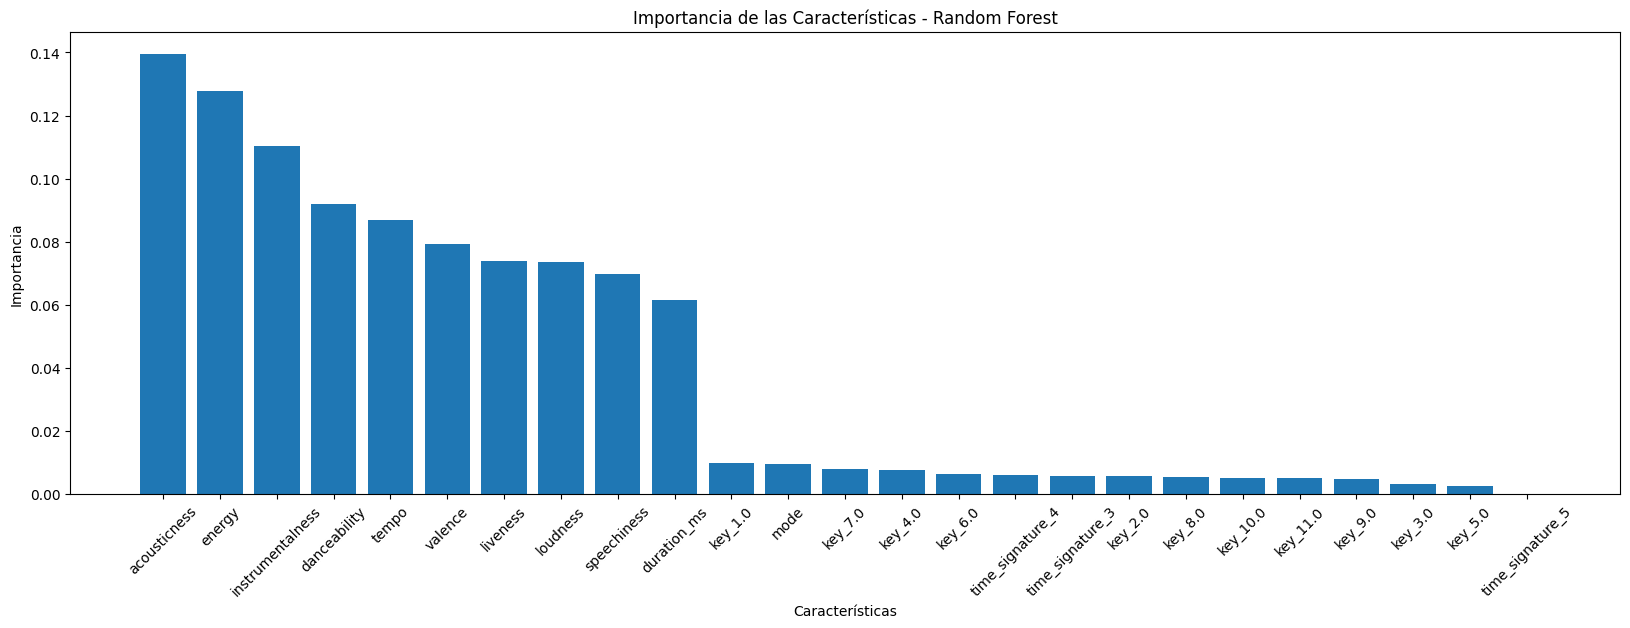

In [84]:
# usando embedded para seleccion atributos
# Importa las bibliotecas necesarias
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Inicializa el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrena el modelo
rf_model.fit(X_train, y_train)

# Grafica la importancia de las características
feature_importances = rf_model.feature_importances_
features = X_train.columns
indices = sorted(range(len(feature_importances)), key=lambda k: feature_importances[k], reverse=True)

plt.figure(figsize=(20, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), [features[i] for i in indices], rotation=45)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de las Características - Random Forest")
plt.show()


In [85]:
from sklearn.metrics import classification_report

# sin smote, en testeo dropeando todas key, mode, time signatures df.drop

# Predice las etiquetas en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Genera el classification report
report = classification_report(y_test, y_pred)

# Imprime el reporte
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       360
           1       0.32      0.17      0.22        36

    accuracy                           0.89       396
   macro avg       0.62      0.57      0.58       396
weighted avg       0.87      0.89      0.88       396



### Removiendo variables menos importantes


In [86]:
# Suponiendo que 'rf_model' es tu modelo entrenado y 'X_train' es tu conjunto de entrenamiento

# Obtener las columnas con importancia menor a 0.02
columns_to_drop = X_train.columns[feature_importances < 0.02]

# Mostrar las columnas que serán eliminadas
print("Columnas a eliminar:", columns_to_drop)

# Dropear las columnas del conjunto de entrenamiento
X_train_filtered = X_train.drop(columns=columns_to_drop, axis=1)

# Dropear las mismas columnas del conjunto de prueba
X_test_filtered = X_test.drop(columns=columns_to_drop, axis=1)

# Imprimir el nuevo conjunto de entrenamiento filtrado
print("Conjunto de entrenamiento filtrado:")
X_train_filtered.head()


Columnas a eliminar: Index(['key_1.0', 'key_10.0', 'key_11.0', 'key_2.0', 'key_3.0', 'key_4.0',
       'key_5.0', 'key_6.0', 'key_7.0', 'key_8.0', 'key_9.0', 'mode',
       'time_signature_3', 'time_signature_4', 'time_signature_5'],
      dtype='object')
Conjunto de entrenamiento filtrado:


,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
1593,1.020899,1.549216,-0.292786,0.155220,-0.323209,-0.084173,-0.629856,-0.590938,0.186988,1.760332
187,-0.692922,-1.168886,0.218905,0.270416,2.644482,-0.390469,0.277184,-0.388368,-0.229423,-0.598733
939,-0.544953,1.724577,-0.579004,0.311886,-0.511142,-0.629762,0.299708,-0.657889,-0.237425,1.803154
862,-0.361448,-0.958452,3.128009,0.251984,-0.276884,0.828331,-0.456057,0.068273,0.600254,-0.341805
400,-0.596786,1.256947,-1.500076,0.169043,-0.508755,-0.403231,0.628433,0.614183,1.153233,1.635761


In [87]:
# Imprimir el nuevo conjunto de entrenamiento filtrado
print("Conjunto de entrenamiento filtrado:")
X_test_filtered.head()

Conjunto de entrenamiento filtrado:


,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
950,-3.517127,-4.144281,-3.723680,0.822886,-2.440287,-2.166446,2.477211,18.492152,-4.476383,1.315213
1588,-3.407016,1.555420,-3.723667,-4.325203,-2.440287,0.267924,2.687092,-15.258573,-4.510334,-3.257046
23,-0.050726,-0.837047,-3.723655,-8.953760,-2.437363,-0.218950,2.303775,-13.772484,-4.545137,-2.752753
230,10.367537,3.033120,-3.723667,-9.355217,-2.440287,-3.007410,2.337326,-12.286396,-4.512721,1.399262
161,-3.987544,-1.962914,-3.723642,0.728425,3.276150,-6.800600,2.538417,6.966709,-4.532237,-4.450540


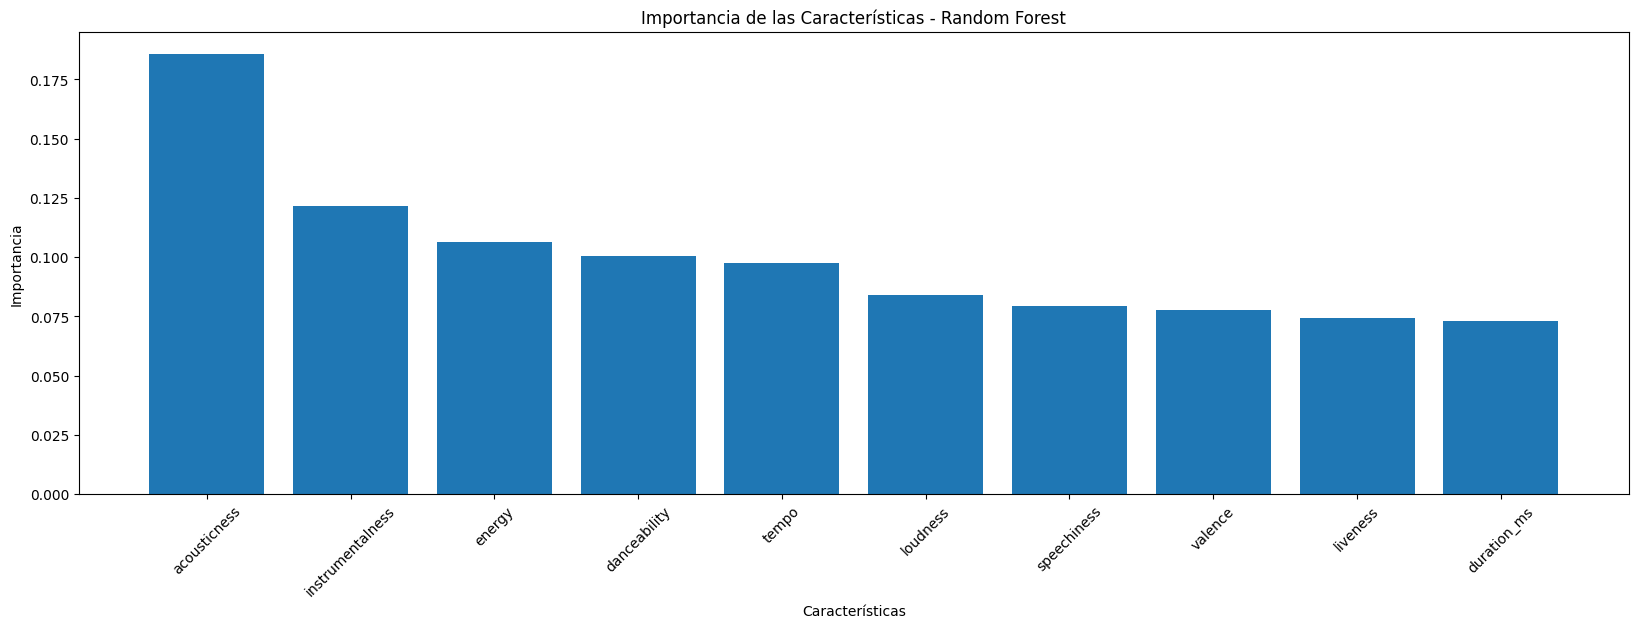

In [88]:
# usando embedded para seleccion atributos
# Importa las bibliotecas necesarias
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Inicializa el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrena el modelo
rf_model.fit(X_train_filtered, y_train)

# Grafica la importancia de las características
feature_importances = rf_model.feature_importances_
features = X_train_filtered.columns
indices = sorted(range(len(feature_importances)), key=lambda k: feature_importances[k], reverse=True)

plt.figure(figsize=(20, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), [features[i] for i in indices], rotation=45)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de las Características - Random Forest")
plt.show()


In [89]:
from sklearn.metrics import classification_report

# sin smote, en testeo dropeando todas key, mode, time signatures df.drop

# Predice las etiquetas en el conjunto de prueba
y_pred = rf_model.predict(X_test_filtered)

# Genera el classification report
report = classification_report(y_test, y_pred)

# Imprime el reporte
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       360
           1       0.35      0.58      0.44        36

    accuracy                           0.86       396
   macro avg       0.65      0.74      0.68       396
weighted avg       0.90      0.86      0.88       396



### Usando SMOTE

In [95]:
# Divide el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_modelar[df_modelar.columns.difference(['death_metal'])], df_modelar['death_metal'], test_size=0.2, random_state=1234)


In [96]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# definicion del método
smote = SMOTE(random_state=101, sampling_strategy="minority")
# aplicación del método
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# contamos la cantidad de observaciones por clase
print(f"Original: {Counter(y_train)}")
print(f"SMOTE   : {Counter(y_train_smote)}")

Original: Counter({0: 1458, 1: 122})
SMOTE   : Counter({0: 1458, 1: 1458})


In [97]:
from sklearn.preprocessing import StandardScaler

# Identifica las columnas numéricas en tus conjuntos de entrenamiento y prueba
numeric_columns = X_train_smote.select_dtypes(include=['float64', 'int64']).columns

# Especifica las columnas que no deseas estandarizar
columns_to_exclude = ['genre_agrup', 'mode', 'key', 'time_signature']

# Obtiene las columnas numéricas que no están en la lista de exclusiones
numeric_columns_to_scale = [col for col in numeric_columns if col not in columns_to_exclude]

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ajusta y transforma solo las columnas numéricas que no están excluidas en el conjunto de entrenamiento
X_train_smote[numeric_columns_to_scale] = scaler.fit_transform(X_train_smote[numeric_columns_to_scale])

# Transforma solo las columnas numéricas que no están excluidas en el conjunto de prueba usando las mismas estadísticas
X_test[numeric_columns_to_scale] = scaler.transform(X_test[numeric_columns_to_scale])


In [98]:
X_train_smote.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key_1.0,key_10.0,key_11.0,key_2.0,key_3.0,...,key_9.0,liveness,loudness,mode,speechiness,tempo,time_signature_3,time_signature_4,time_signature_5,valence
0,1.597862,2.077543,-0.355389,-0.297585,-0.708967,0,0,0,0,0,...,0,-0.177836,-0.966229,1.0,-0.909520,0.248488,0,1,0,2.339010
1,-0.479106,-0.721292,0.185930,-0.169460,1.810863,0,0,0,0,0,...,0,-0.510776,0.083235,0.0,-0.682523,-0.192607,0,1,0,-0.277770
2,-0.299783,2.258113,-0.658179,-0.123335,-0.868538,1,0,0,0,0,...,0,-0.770886,0.109295,1.0,-0.984545,-0.201084,0,1,0,2.386509
3,-0.077395,-0.504608,3.263478,-0.189960,-0.669633,0,1,0,0,0,...,0,0.814048,-0.765140,0.0,-0.170816,0.686252,0,1,0,0.007226
4,-0.362599,1.776593,-1.632583,-0.282210,-0.866512,0,0,0,1,0,...,0,-0.524649,0.489638,1.0,0.440922,1.272009,0,1,0,2.200830


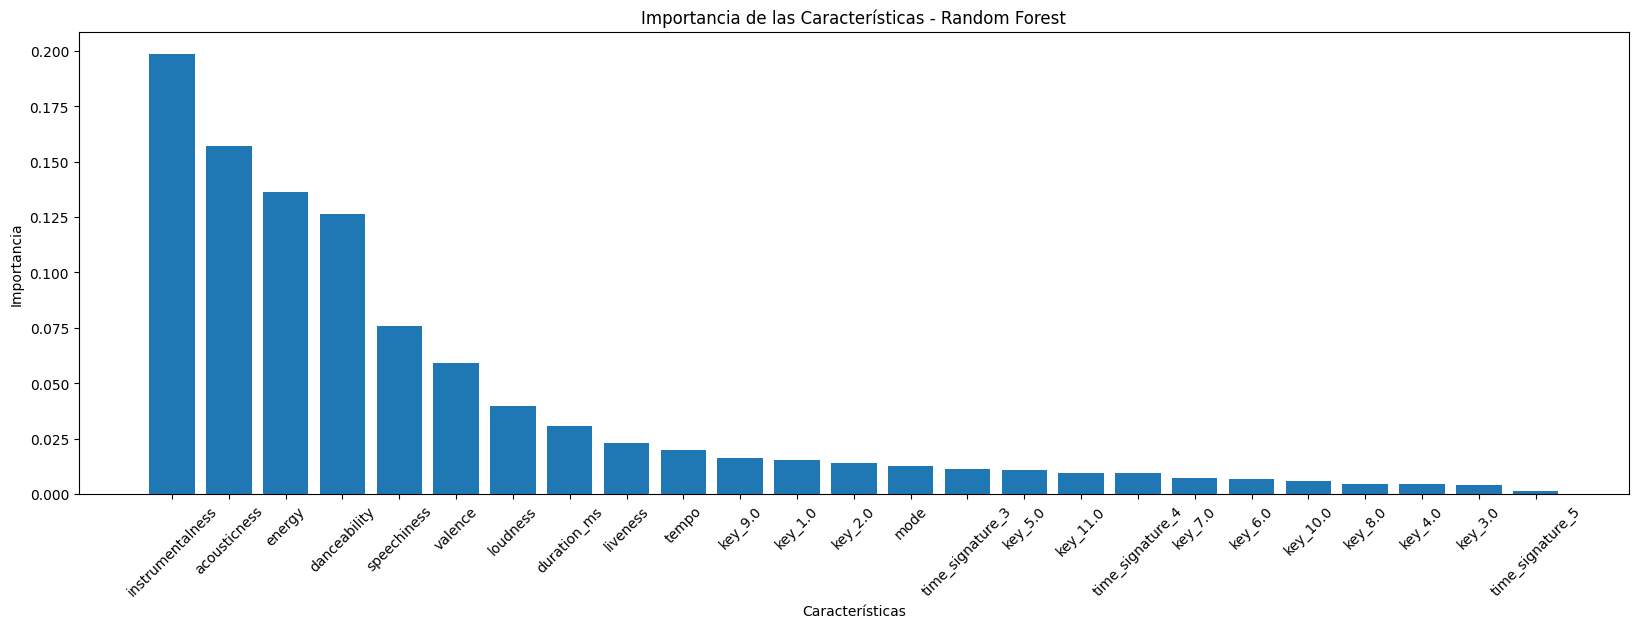

In [99]:
# usando embedded para seleccion atributos
# Importa las bibliotecas necesarias
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Inicializa el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrena el modelo
rf_model.fit(X_train_smote, y_train_smote)

# Grafica la importancia de las características
feature_importances = rf_model.feature_importances_
features = X_train_smote.columns
indices = sorted(range(len(feature_importances)), key=lambda k: feature_importances[k], reverse=True)

plt.figure(figsize=(20, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), [features[i] for i in indices], rotation=45)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de las Características - Random Forest")
plt.show()


In [100]:
from sklearn.metrics import classification_report

# sin smote, en testeo dropeando todas key, mode, time signatures df.drop

# Predice las etiquetas en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Genera el classification report
report = classification_report(y_test, y_pred)

# Imprime el reporte
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       360
           1       0.50      0.39      0.44        36

    accuracy                           0.91       396
   macro avg       0.72      0.68      0.69       396
weighted avg       0.90      0.91      0.90       396



In [101]:
# Suponiendo que 'rf_model' es tu modelo entrenado y 'X_train' es tu conjunto de entrenamiento

# Obtener las columnas con importancia menor a 0.02
columns_to_drop = X_train_smote.columns[feature_importances < 0.025]

# Mostrar las columnas que serán eliminadas
print("Columnas a eliminar:", columns_to_drop)

# Dropear las columnas del conjunto de entrenamiento
X_train_smote_filtered = X_train_smote.drop(columns=columns_to_drop, axis=1)

# Dropear las mismas columnas del conjunto de prueba
X_test_filtered = X_test.drop(columns=columns_to_drop, axis=1)

# Imprimir el nuevo conjunto de entrenamiento filtrado
print("Conjunto de entrenamiento filtrado:")
X_train_smote_filtered.head()

Columnas a eliminar: Index(['key_1.0', 'key_10.0', 'key_11.0', 'key_2.0', 'key_3.0', 'key_4.0',
       'key_5.0', 'key_6.0', 'key_7.0', 'key_8.0', 'key_9.0', 'liveness',
       'mode', 'tempo', 'time_signature_3', 'time_signature_4',
       'time_signature_5'],
      dtype='object')
Conjunto de entrenamiento filtrado:


,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,speechiness,valence
0,1.597862,2.077543,-0.355389,-0.297585,-0.708967,-0.966229,-0.909520,2.339010
1,-0.479106,-0.721292,0.185930,-0.169460,1.810863,0.083235,-0.682523,-0.277770
2,-0.299783,2.258113,-0.658179,-0.123335,-0.868538,0.109295,-0.984545,2.386509
3,-0.077395,-0.504608,3.263478,-0.189960,-0.669633,-0.765140,-0.170816,0.007226
4,-0.362599,1.776593,-1.632583,-0.282210,-0.866512,0.489638,0.440922,2.200830


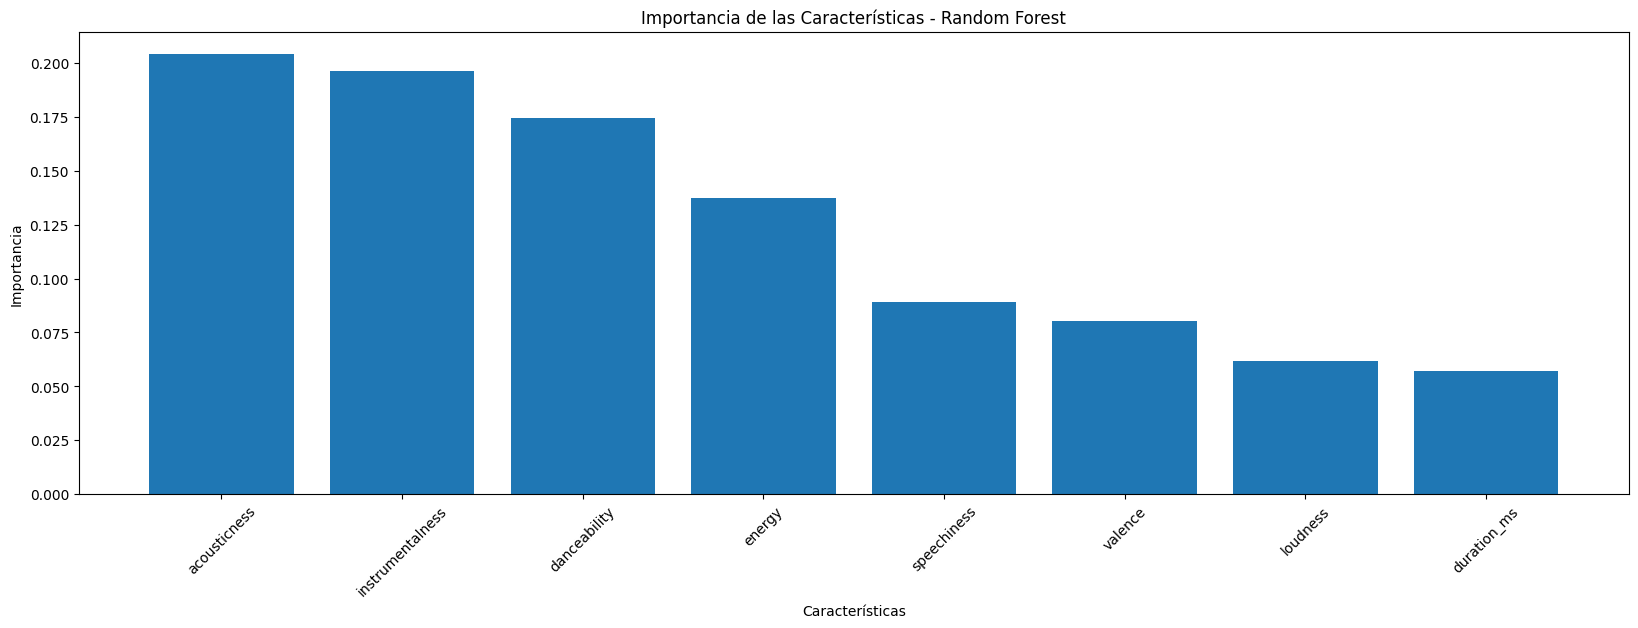

In [102]:
# usando embedded para seleccion atributos
# Importa las bibliotecas necesarias
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Inicializa el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrena el modelo
rf_model.fit(X_train_smote_filtered, y_train_smote)

# Grafica la importancia de las características
feature_importances = rf_model.feature_importances_
features = X_train_smote_filtered.columns
indices = sorted(range(len(feature_importances)), key=lambda k: feature_importances[k], reverse=True)

plt.figure(figsize=(20, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), [features[i] for i in indices], rotation=45)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de las Características - Random Forest")
plt.show()


In [103]:
from sklearn.metrics import classification_report

# sin smote, en testeo dropeando todas key, mode, time signatures df.drop

# Predice las etiquetas en el conjunto de prueba
y_pred = rf_model.predict(X_test_filtered)

# Genera el classification report
report = classification_report(y_test, y_pred)

# Imprime el reporte
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       360
           1       0.41      0.53      0.46        36

    accuracy                           0.89       396
   macro avg       0.68      0.73      0.70       396
weighted avg       0.90      0.89      0.89       396



### SMOTE, filtrando variables superior a 0.025 importancia segun randomforest

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Definir modelos y sus respectivos hiperparámetros
models = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2']
        }
    }
}

# Realizar búsqueda de hiperparámetros para cada modelo con GridSearchCV y validación cruzada
for model_name, config in models.items():
    clf = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy')
    clf.fit(X_train_smote_filtered, y_train_smote)

    print(f"Mejores parámetros para {model_name}: {clf.best_params_}")

    # Evaluar el modelo en el conjunto de prueba
    y_pred = clf.predict(X_test_filtered)
    print(f"Reporte de clasificación para {model_name} en el conjunto de prueba:")
    print(classification_report(y_test, y_pred))
    print("\n")


Mejores parámetros para RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Reporte de clasificación para RandomForest en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       360
           1       0.46      0.67      0.55        36

    accuracy                           0.90       396
   macro avg       0.71      0.79      0.74       396
weighted avg       0.92      0.90      0.91       396



Mejores parámetros para SVM: {'C': 10, 'kernel': 'rbf'}
Reporte de clasificación para SVM en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       360
           1       0.30      0.69      0.42        36

    accuracy                           0.83       396
   macro avg       0.63      0.77      0.66       396
weighted avg       0.90      0.83      0.85       396



Mejores parámetros para LogisticRegression: {'C': 0.1,

### Busqueda mejores hiperparam reg logistica

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Definir el modelo y su respectiva cuadrícula de hiperparámetros
logistic_regression = LogisticRegression()
param_grid = {
    'penalty': ['l2'],  # Puedes agregar 'none' si lo deseas
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter':[300, 500],
    'class_weight': [None, 'balanced', {0: 1, 1: 5}, {0: 1, 1: 10}]
}

# Realizar búsqueda de hiperparámetros con GridSearchCV y validación cruzada
clf = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='precision')
clf.fit(X_train_smote_filtered, y_train_smote)

print(f"Mejores parámetros para Logistic Regression: {clf.best_params_}")

# Evaluar el modelo en el conjunto de prueba
y_pred = clf.predict(X_test_filtered)
print("Reporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Mejores parámetros para Logistic Regression: {'C': 0.01, 'class_weight': None, 'max_iter': 300, 'penalty': 'l2', 'solver': 'newton-cg'}
Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88       360
           1       0.32      1.00      0.49        36

    accuracy                           0.81       396
   macro avg       0.66      0.90      0.69       396
weighted avg       0.94      0.81      0.85       396



In [106]:
best_params = clf.best_params_
logit = LogisticRegression(**best_params, random_state=1234)
logit.fit(X_train_smote_filtered, y_train_smote)
y_pred = logit.predict(X_test_filtered)
print("Reporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_pred))


Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88       360
           1       0.32      1.00      0.49        36

    accuracy                           0.81       396
   macro avg       0.66      0.90      0.69       396
weighted avg       0.94      0.81      0.85       396



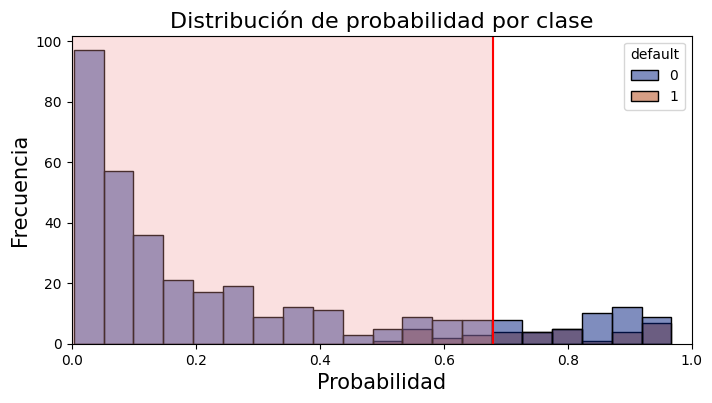

In [124]:

# Obtener las probabilidades de predicción para la clase positiva
y_prob = logit.predict_proba(X_test_filtered)[:, 1]

# Crear un DataFrame con las probabilidades y la variable objetivo
df_prob = pd.DataFrame({'Probabilidad': y_prob, 'default': y_test})

# Definir el umbral (ajústalo según sea necesario)
umbral = 0.68

# Crear una figura y un eje para el gráfico
plt.figure(figsize=(8, 4))
ax = sns.histplot(x='Probabilidad', hue='default', data=df_prob, kde=False, bins=20, palette='dark')

# Limitar el eje x al rango de 0.3 a 0.6
ax.set_xlim(0, 1)

# Establecer título y etiquetas
plt.title('Distribución de probabilidad por clase', fontsize=16)
ax.set_xlabel('Probabilidad', fontsize=15)
ax.set_ylabel('Frecuencia', fontsize=15)

# Marcar el umbral en rojo
ax.axvline(x=umbral, color='r')

# Sombrear la zona donde las probabilidades son menores al umbral
ax.axvspan(0, umbral, color='#EF9A9A', alpha=0.3)

# Mostrar el gráfico
plt.show()


In [123]:
# Supongamos que has ajustado el umbral a un valor específico
umbral = 0.68

# Obtener las probabilidades de predicción para la clase positiva
y_prob = logit.predict_proba(X_test_filtered)[:, 1]

# Ajustar las predicciones con el nuevo umbral
y_pred_ajustado = (y_prob >= umbral).astype(int)

# Calcular el classification report con las predicciones ajustadas
report_ajustado = classification_report(y_test, y_pred_ajustado)

# Imprimir el classification report ajustado
print("Classification Report con umbral ajustado:\n", report_ajustado)


Classification Report con umbral ajustado:
               precision    recall  f1-score   support

           0       0.97      0.87      0.91       360
           1       0.34      0.69      0.46        36

    accuracy                           0.85       396
   macro avg       0.65      0.78      0.69       396
weighted avg       0.91      0.85      0.87       396

